# PFAM Annotation Module

Este notebook demuestra el uso de los dos métodos principales del módulo `pfam_annotation.py` de pyMut.


## 1. Importar librerías y cargar datos


In [1]:
import sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Añadir el directorio src al path para importar pyMut
sys.path.insert(0, '../../../src')

# Importar pyMut
from pyMut import read_maf
from pyMut.utils.database import build_embedded_db, connect_db

# Cargar datos de ejemplo
maf_file = "../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz"
maf_data = read_maf(maf_file,assembly="37")

# Configurar base de datos PFAM
try:
    build_embedded_db(force_rebuild=False)
except:
    pass


2025-07-30 22:23:57,983 | INFO | pyMut.input | Starting MAF reading: ../../../src/pyMut/data/examples/MAF/tcga_laml_VEP_annotated.maf.gz
2025-07-30 22:23:57,989 | INFO | pyMut.input | Reading MAF with 'pyarrow' engine…
2025-07-30 22:23:58,008 | INFO | pyMut.input | Reading with 'pyarrow' completed.
2025-07-30 22:23:58,015 | INFO | pyMut.input | Detected 193 unique samples.
2025-07-30 22:23:58,107 | INFO | pyMut.input | Saving to cache: ../../../src/pyMut/data/examples/MAF/.pymut_cache/tcga_laml_VEP_annotated.maf_c536f1e0e8b7d2e6.parquet
2025-07-30 22:23:58,164 | INFO | pyMut.input | MAF processed successfully: 2207 rows, 237 columns in 0.18 seconds


✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb


## 2. Uso del método annotate_pfam()


In [2]:
# Anotar variantes con dominios PFAM
maf_data = maf_data.annotate_pfam()

# Mostrar ejemplos de anotaciones
if 'pfam_id' in maf_data.data.columns:
    pfam_examples = maf_data.data[
        maf_data.data['pfam_id'].notna()
    ][['Hugo_Symbol', 'Protein_Change', 'uniprot', 'aa_pos', 'pfam_id', 'pfam_name']].head(10)
    display(pfam_examples)


2025-07-30 22:24:05,702 | INFO | pyMut.analysis.pfam_annotation | UniProt resolution summary:
2025-07-30 22:24:05,702 | INFO | pyMut.analysis.pfam_annotation |    Total identifiers processed: 1,552
2025-07-30 22:24:05,703 | INFO | pyMut.analysis.pfam_annotation |    Direct accessions: 0
2025-07-30 22:24:05,703 | INFO | pyMut.analysis.pfam_annotation |    Resolved via short_name: 1,474
2025-07-30 22:24:05,703 | INFO | pyMut.analysis.pfam_annotation |    Resolved via external ID: 0
2025-07-30 22:24:05,704 | INFO | pyMut.analysis.pfam_annotation |    Unresolved: 78
2025-07-30 22:24:06,680 | INFO | pyMut.analysis.pfam_annotation | Variantes anotadas con PFAM: 1119/1958
2025-07-30 22:24:07,252 | INFO | pyMut.analysis.pfam_annotation | 
Final annotation summary:
2025-07-30 22:24:07,253 | INFO | pyMut.analysis.pfam_annotation |    Total variants processed: 2,207
2025-07-30 22:24:07,253 | INFO | pyMut.analysis.pfam_annotation |    UniProt identifiers resolved: 1,474/1,552
2025-07-30 22:24:07,2

,Hugo_Symbol,Protein_Change,uniprot,aa_pos,pfam_id,pfam_name
0,ABCA10,p.K960R,ABCAA_HUMAN,960.0,PF00028,PF00028
1,ABCA4,p.R1517H,ABCA4_HUMAN,1517.0,PF00028,PF00028
2,ABCB11,p.A1283V,ABCBB_HUMAN,1283.0,PF00028,PF00028
3,ABCC11,p.I490I,ABCCB_HUMAN,490.0,PF00028,PF00028
4,ABCC3,p.P1271S,MRP3_HUMAN,1271.0,PF00076,PF00076
5,ABCF1,p.G658S,ABCF1_HUMAN,658.0,PF00093,PF00093
6,ABCG4,p.Y567C,ABCG4_HUMAN,567.0,PF00094,PF00094
7,ABCG8,p.M208I,ABCG8_HUMAN,208.0,PF00122,PF00122
8,ABL1,p.P918L,ABL1_HUMAN,918.0,PF00122,PF00122
9,ACAN,p.S1756S,None,1756.0,PF00122,PF00122


## 3. Uso del método pfam_domains()


,pfam_id,pfam_name,n_genes,n_variants
62,PF00180,PF00180,24,36
453,PF16276,PF16276,32,32
405,PF13853,PF13853,27,30
327,PF07714,PF07714,22,29
32,PF00071,PF00071,19,24
15,PF00028,PF00028,17,20
31,PF00069,PF00069,18,20
0,PF00001,PF00001,16,18
105,PF00520,PF00520,16,16
151,PF00853,PF00853,11,15


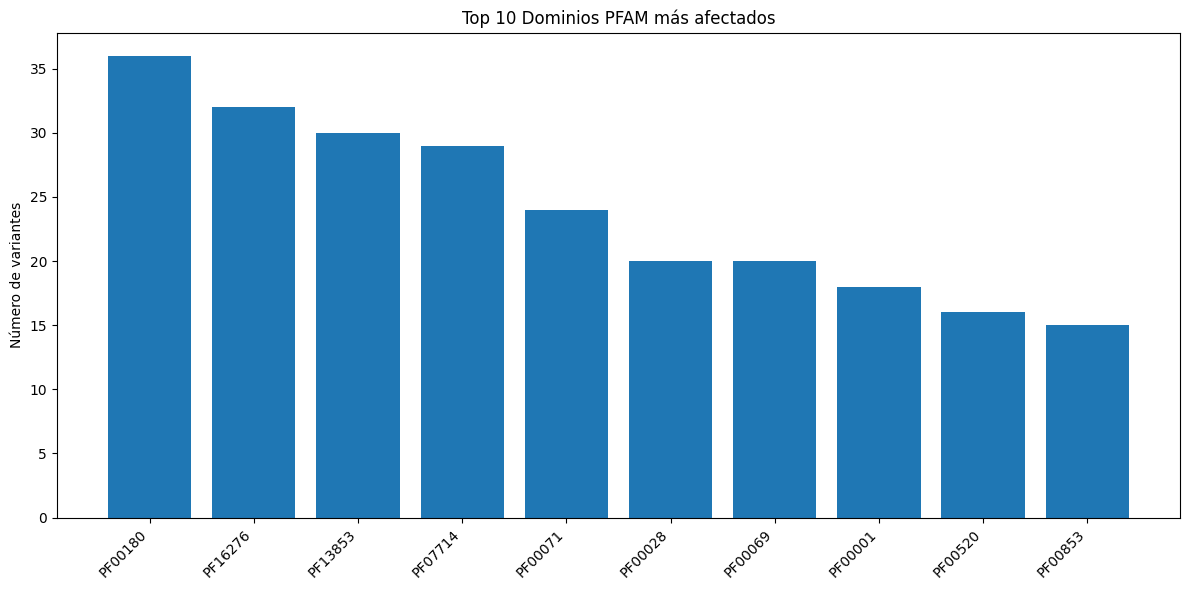

,uniprot,aa_pos,pfam_id,pfam_name,n_variants,n_genes
614,FLT3_HUMAN,835.0,PF00071,PF00071,3,1
607,FLT3_HUMAN,601.0,PF00454,PF00454,2,1
437,DNM3A_HUMAN,882.0,PF01403,PF01403,2,1
850,KIT_HUMAN,418.0,PF01352,PF01352,2,1
748,IDHC_HUMAN,132.0,PF07678,PF07678,2,1
691,GRIK4_HUMAN,180.0,PF03522,PF03522,1,1
692,GRIK4_HUMAN,709.0,PF03516,PF03516,1,1
693,GRIP1_HUMAN,470.0,PF03522,PF03522,1,1
694,GRM3_HUMAN,288.0,PF05110,PF05110,1,1
690,GRIK3_HUMAN,450.0,PF03516,PF03516,1,1


In [3]:
# Resumen por dominio PFAM
pfam_summary = maf_data.pfam_domains(
    summarize_by='PfamDomain',
    top_n=10,
    include_synonymous=False
)

if not pfam_summary.empty:
    display(pfam_summary)

    # Visualización
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(pfam_summary)), pfam_summary['n_variants'])
    plt.xticks(range(len(pfam_summary)), pfam_summary['pfam_name'], rotation=45, ha='right')
    plt.ylabel('Número de variantes')
    plt.title('Top 10 Dominios PFAM más afectados')
    plt.tight_layout()
    plt.show()

# Resumen por posición de aminoácido
aa_summary = maf_data.pfam_domains(
    summarize_by='AAPos',
    top_n=10,
    include_synonymous=False
)

if not aa_summary.empty:
    display(aa_summary)


In [4]:
# Intentar construir la base de datos embebida
print("Configurando base de datos PFAM...")
try:
    # Esto creará la base de datos si no existe
    build_embedded_db(force_rebuild=False)
    print("✓ Base de datos PFAM configurada correctamente")
except Exception as e:
    print(f"⚠️  Error configurando base de datos: {e}")
    print("Continuaremos con las funciones disponibles...")

# Intentar conectar a la base de datos
try:
    db_conn = connect_db()
    print("✓ Conexión a base de datos establecida")

    # Verificar tablas disponibles
    tables = db_conn.execute("SHOW TABLES").fetchall()
    print(f"Tablas disponibles: {[table[0] for table in tables]}")

    db_conn.close()
except Exception as e:
    print(f"⚠️  Error conectando a base de datos: {e}")
    db_conn = None


Configurando base de datos PFAM...
✅ Database already exists at /home/luisruimore/Escritorio/TFG/docs/examples/analysis/../../../src/pyMut/data/resources/data.duckdb
✓ Base de datos PFAM configurada correctamente
✓ Conexión a base de datos establecida
Tablas disponibles: ['meta', 'pfam', 'xref']
